In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('british.csv',encoding='latin1')

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
df = df.drop('route',axis=1)

In [6]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0


In [7]:
df.shape

(50000, 13)

In [8]:
#Considering the feature num_passenger

In [9]:
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

<Axes: xlabel='num_passengers', ylabel='Count'>

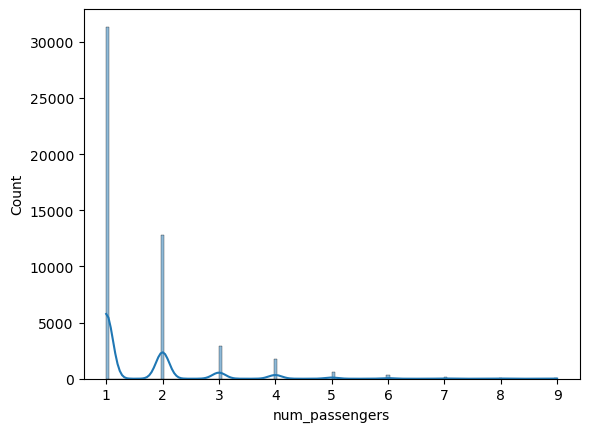

In [10]:
sns.histplot(data=df['num_passengers'],kde=True)


In [11]:
num_passengers_mean = df['num_passengers'].mean()
num_passengers_median = df['num_passengers'].median()
num_passengers_std = df['num_passengers'].std()
num_passengers_var = df['num_passengers'].var()
print('mean:',num_passengers_mean)
print('median:',num_passengers_median)
print('std deviation:',num_passengers_std)
print('variance:',num_passengers_var)


mean: 1.59124
median: 1.0
std deviation: 1.0201647303849517
variance: 1.0407360771214011


In [12]:
pass_num_grouped = df.groupby(['num_passengers','booking_complete']).size().unstack()
pass_num_grouped['total']=pass_num_grouped.sum(axis=1)
pass_num_grouped['%booked']=(pass_num_grouped[1]/pass_num_grouped['total'])*100
pass_num_grouped['%not booked']=(pass_num_grouped[0]/pass_num_grouped['total'])*100
print(pass_num_grouped)

booking_complete      0     1  total    %booked  %not booked
num_passengers                                              
1                 26897  4455  31352  14.209620    85.790380
2                 10753  2051  12804  16.018432    83.981568
3                  2450   491   2941  16.695002    83.304998
4                  1509   275   1784  15.414798    84.585202
5                   452   109    561  19.429590    80.570410
6                   235    54    289  18.685121    81.314879
7                    96    18    114  15.789474    84.210526
8                    77    12     89  13.483146    86.516854
9                    53    13     66  19.696970    80.303030


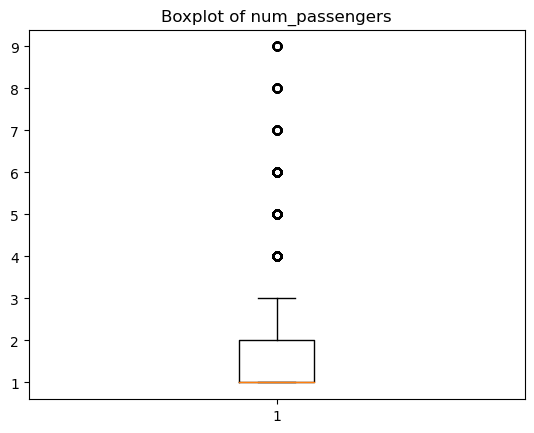

In [13]:
num_passngr = df['num_passengers']
plt.boxplot(num_passngr)
plt.title("Boxplot of num_passengers")
plt.show()

In [14]:
#Calculating quantile ranges
q1 = num_passngr.quantile(0.25)
q3 = num_passngr.quantile(0.75)

#calculating IQR
iqr = q3-q1

#defining outlier thresholds
lower = q1-1.5*iqr
upper = q3+1.5*iqr

#outliers
outliers_IQR = num_passngr[~num_passngr.between(lower, upper)]

print("Outliers detected by IQR:", outliers_IQR.values)
print(len(outliers_IQR))

Outliers detected by IQR: [4 6 4 ... 5 4 4]
2903


In [15]:
outliers_IQR.value_counts()

4    1784
5     561
6     289
7     114
8      89
9      66
Name: num_passengers, dtype: int64

In [16]:
#Considering the purchase lead

In [17]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0


In [18]:
df['purchase_lead'].value_counts()

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

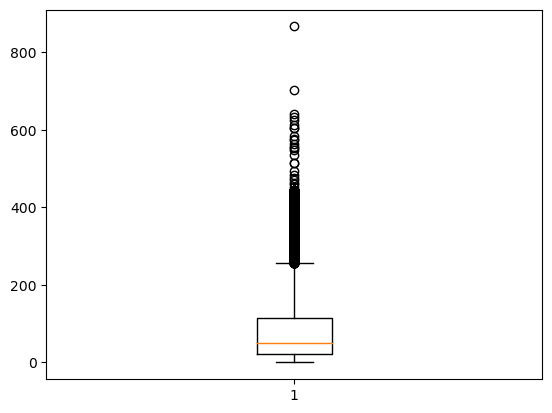

In [19]:
pur_lead = df['purchase_lead']
plt.boxplot(pur_lead)
plt.show()

<Axes: xlabel='purchase_lead', ylabel='Count'>

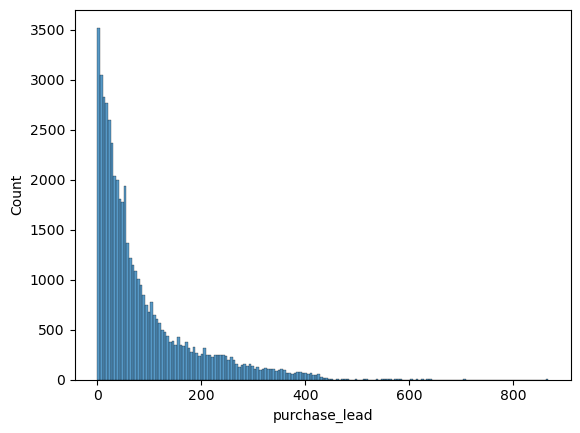

In [20]:
sns.histplot(pur_lead)

In [21]:
#Considering the length of stay

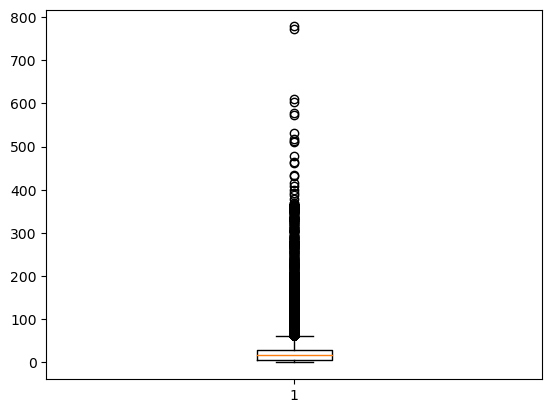

In [22]:
len_stay = df['length_of_stay']
plt.boxplot(len_stay)
plt.show()


<Axes: xlabel='length_of_stay', ylabel='Count'>

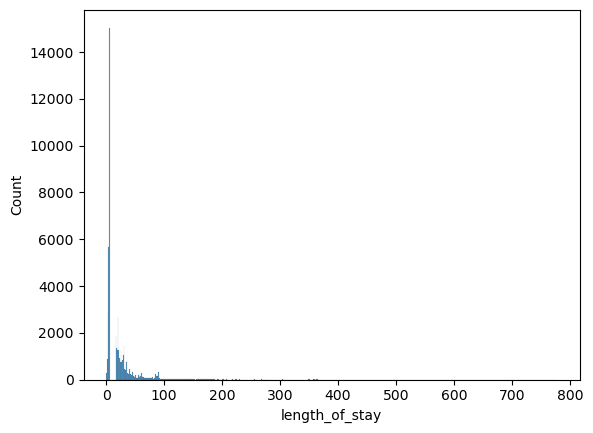

In [23]:
sns.histplot(len_stay)

In [24]:
print(len_stay.min())
print(len_stay.max())

0
778


In [25]:
#Consider flight hour and flight duration

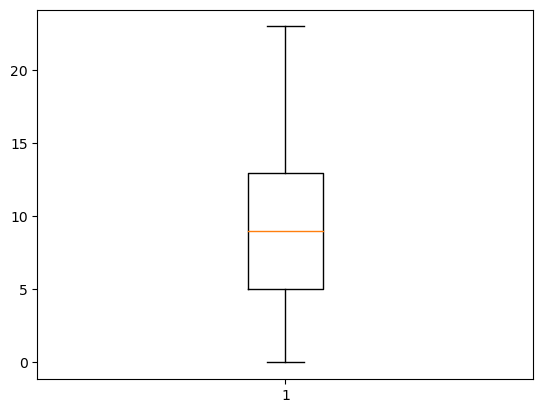

In [26]:
flight_hr = df['flight_hour']
flight_dur = df['flight_duration']

plt.boxplot(flight_hr)
plt.show()


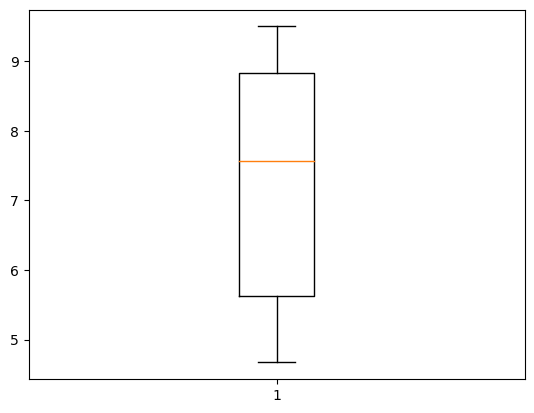

In [27]:
plt.boxplot(flight_dur)
plt.show()

<Axes: xlabel='flight_duration', ylabel='Count'>

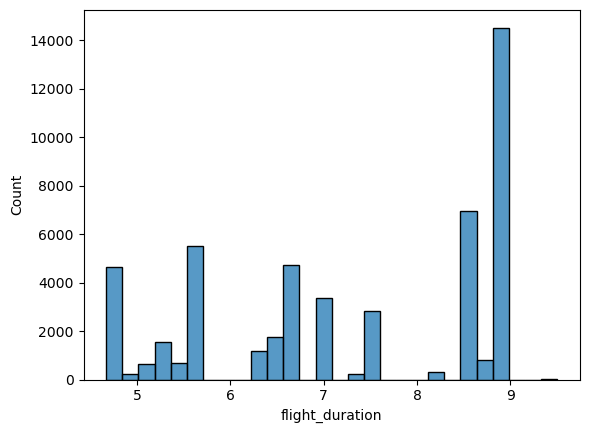

In [28]:
sns.histplot(flight_dur)

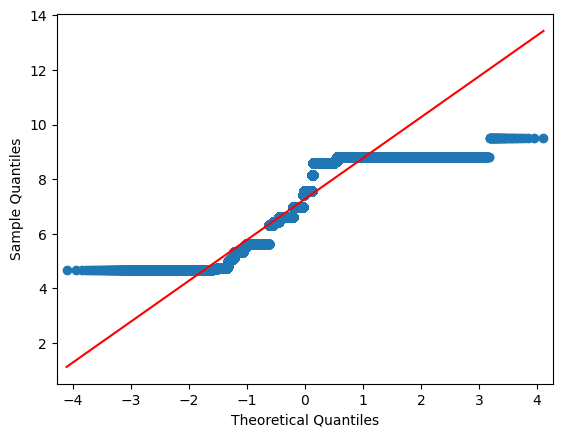

In [29]:
import statsmodels.api as sm

sm.qqplot(flight_dur, line='s')
plt.show()

<Axes: xlabel='flight_hour', ylabel='Count'>

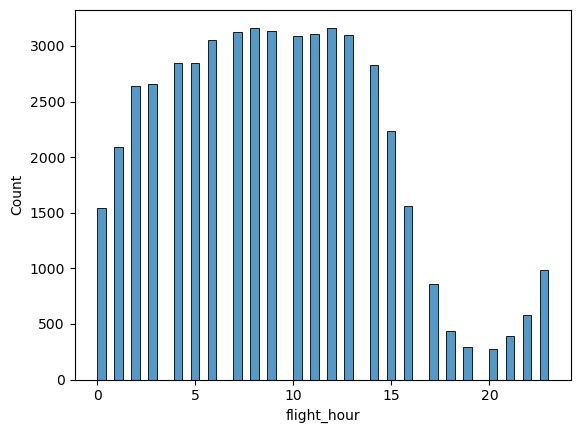

In [30]:
sns.histplot(flight_hr)

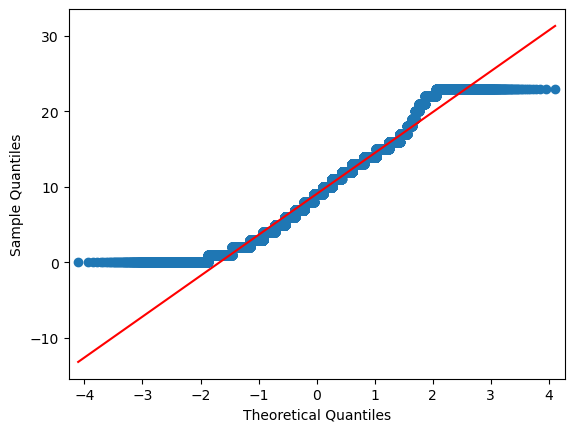

In [31]:
import statsmodels.api as sm

sm.qqplot(flight_hr, line='s')
plt.show()

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0


In [33]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [34]:
#Encoding Categorical Variables

In [35]:
#one-hot encoding sales channel
new_df = pd.get_dummies(df['sales_channel'])
new_df.drop('Internet',axis=1,inplace=True)
new_df

,Mobile
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [36]:
df = pd.concat([df,new_df],axis=1)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,0


In [37]:
df.shape

(50000, 14)

In [38]:
df.drop('sales_channel',axis=1,inplace=True)

In [39]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile
0,2,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0
1,1,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0
2,2,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,0
3,1,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0
4,2,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,0


In [40]:
df = df.rename(columns={'Mobile':'Mobile_sales_channel'})
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile_sales_channel
0,2,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0
1,1,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0
2,2,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,0
3,1,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0
4,2,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,0


In [41]:
# encoding trip type
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [42]:
new_df=pd.get_dummies(df['trip_type'])
new_df.head()

,CircleTrip,OneWay,RoundTrip
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [43]:
new_df.drop('CircleTrip',axis=1,inplace=True)
new_df

,OneWay,RoundTrip
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
49995,0,1
49996,0,1
49997,0,1
49998,0,1


In [44]:
df = pd.concat([df,new_df],axis=1)
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile_sales_channel,OneWay,RoundTrip
0,2,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0,0,1
1,1,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0,0,1
2,2,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,0,0,1
3,1,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0,0,1
4,2,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,0,0,1


In [45]:
df.drop('trip_type',axis=1,inplace=True)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile_sales_channel,OneWay,RoundTrip
0,2,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,Wed,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,Wed,India,1,0,1,5.52,0,0,0,1


In [46]:
df.shape

(50000, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  object 
 5   booking_origin         50000 non-null  object 
 6   wants_extra_baggage    50000 non-null  int64  
 7   wants_preferred_seat   50000 non-null  int64  
 8   wants_in_flight_meals  50000 non-null  int64  
 9   flight_duration        50000 non-null  float64
 10  booking_complete       50000 non-null  int64  
 11  Mobile_sales_channel   50000 non-null  uint8  
 12  OneWay                 50000 non-null  uint8  
 13  RoundTrip              50000 non-null  uint8  
dtypes: float64(1), int64(8), object(2), uint8(3)
memory us

In [48]:
# encoding flight day
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']])# Specifying the order of days

In [49]:
df['flight_day_encoded'] = oe.fit_transform(df[['flight_day']])
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile_sales_channel,OneWay,RoundTrip,flight_day_encoded
0,2,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0,0,1,5.0
1,1,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0,0,1,5.0
2,2,243,22,17,Wed,India,1,1,0,5.52,0,0,0,1,2.0
3,1,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0,0,1,5.0
4,2,68,22,15,Wed,India,1,0,1,5.52,0,0,0,1,2.0


In [50]:
df['flight_day']

0        Sat
1        Sat
2        Wed
3        Sat
4        Wed
        ... 
49995    Sat
49996    Sun
49997    Sat
49998    Mon
49999    Thu
Name: flight_day, Length: 50000, dtype: object

In [51]:
df['flight_day_encoded']

0        5.0
1        5.0
2        2.0
3        5.0
4        2.0
        ... 
49995    5.0
49996    6.0
49997    5.0
49998    0.0
49999    3.0
Name: flight_day_encoded, Length: 50000, dtype: float64

In [52]:
df['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [53]:
df['flight_day_encoded'].value_counts()

0.0    8102
2.0    7674
1.0    7673
3.0    7424
4.0    6761
6.0    6554
5.0    5812
Name: flight_day_encoded, dtype: int64

In [54]:
df.drop('flight_day',axis=1,inplace=True)

In [55]:
df.head

<bound method NDFrame.head of        num_passengers  purchase_lead  length_of_stay  flight_hour  \
0                   2            262              19            7   
1                   1            112              20            3   
2                   2            243              22           17   
3                   1             96              31            4   
4                   2             68              22           15   
...               ...            ...             ...          ...   
49995               2             27               6            9   
49996               1            111               6            4   
49997               1             24               6           22   
49998               1             15               6           11   
49999               1             19               6           10   

      booking_origin  wants_extra_baggage  wants_preferred_seat  \
0        New Zealand                    1                     0   
1      

In [56]:
df.shape

(50000, 14)

In [57]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [58]:
del new_df # deleting some unwanted variables

In [59]:
del pur_lead

In [60]:
new_df = pd.get_dummies(df['booking_origin'],prefix='booking_origin',drop_first=True)
new_df

,booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,booking_origin_Austria,booking_origin_Bahrain,booking_origin_Bangladesh,booking_origin_Belarus,booking_origin_Belgium,booking_origin_Bhutan,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
country_list = []
for value in df['booking_origin'].values:
  country_list.append(value)
country_list = set(country_list)
country_list = list(country_list)

In [62]:
for country in country_list:
  print(country)

Saudi Arabia
Canada
Seychelles
Norway
Mexico
Oman
Taiwan
Bahrain
India
Malta
Panama
Sweden
Tunisia
Czech Republic
Hungary
South Korea
Belgium
Paraguay
Belarus
United Kingdom
Turkey
Bulgaria
Bangladesh
Vanuatu
Mongolia
Solomon Islands
Afghanistan
Denmark
Réunion
Slovakia
Chile
Peru
Myanmar (Burma)
Estonia
Italy
Papua New Guinea
Guatemala
United States
Nepal
Indonesia
Thailand
Kuwait
Greece
Colombia
Cambodia
Laos
Bhutan
Portugal
Svalbard & Jan Mayen
Hong Kong
Iran
Gibraltar
Kenya
Netherlands
Spain
China
Romania
Sri Lanka
Czechia
Tanzania
Tonga
Ghana
Brazil
Egypt
Cyprus
Brunei
Jordan
Philippines
Lebanon
Argentina
Guam
Japan
Russia
Kazakhstan
Croatia
United Arab Emirates
Nicaragua
Iraq
Algeria
France
Singapore
Malaysia
Switzerland
Finland
(not set)
Maldives
Austria
Norfolk Island
Israel
Timor-Leste
Ukraine
Mauritius
Qatar
Vietnam
Ireland
Slovenia
Australia
New Zealand
South Africa
Poland
Macau
New Caledonia
Pakistan
Germany


In [63]:
df = pd.concat([df,new_df],axis=1)
df.drop('booking_origin',inplace=True,axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile_sales_channel,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.isnull().sum()

num_passengers                         0
purchase_lead                          0
length_of_stay                         0
flight_hour                            0
wants_extra_baggage                    0
                                      ..
booking_origin_United Arab Emirates    0
booking_origin_United Kingdom          0
booking_origin_United States           0
booking_origin_Vanuatu                 0
booking_origin_Vietnam                 0
Length: 116, dtype: int64

In [67]:
import dtale

In [68]:
dtale.show(df)

In [69]:
#Model Implimentation :Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

In [71]:
X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
y_pred = rf.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8532


In [75]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[8366, 1314],
       [ 154,  166]], dtype=int64)

In [76]:
#Feature importance

In [77]:
feature_importances = rf.feature_importances_
feature_names = X.columns

In [78]:
feature_data = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
feature_data.sort_values("importance", ascending=True, inplace=True)

C:\Users\issac\AppData\Local\Temp\ipykernel_2160\2275743514.py:15: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



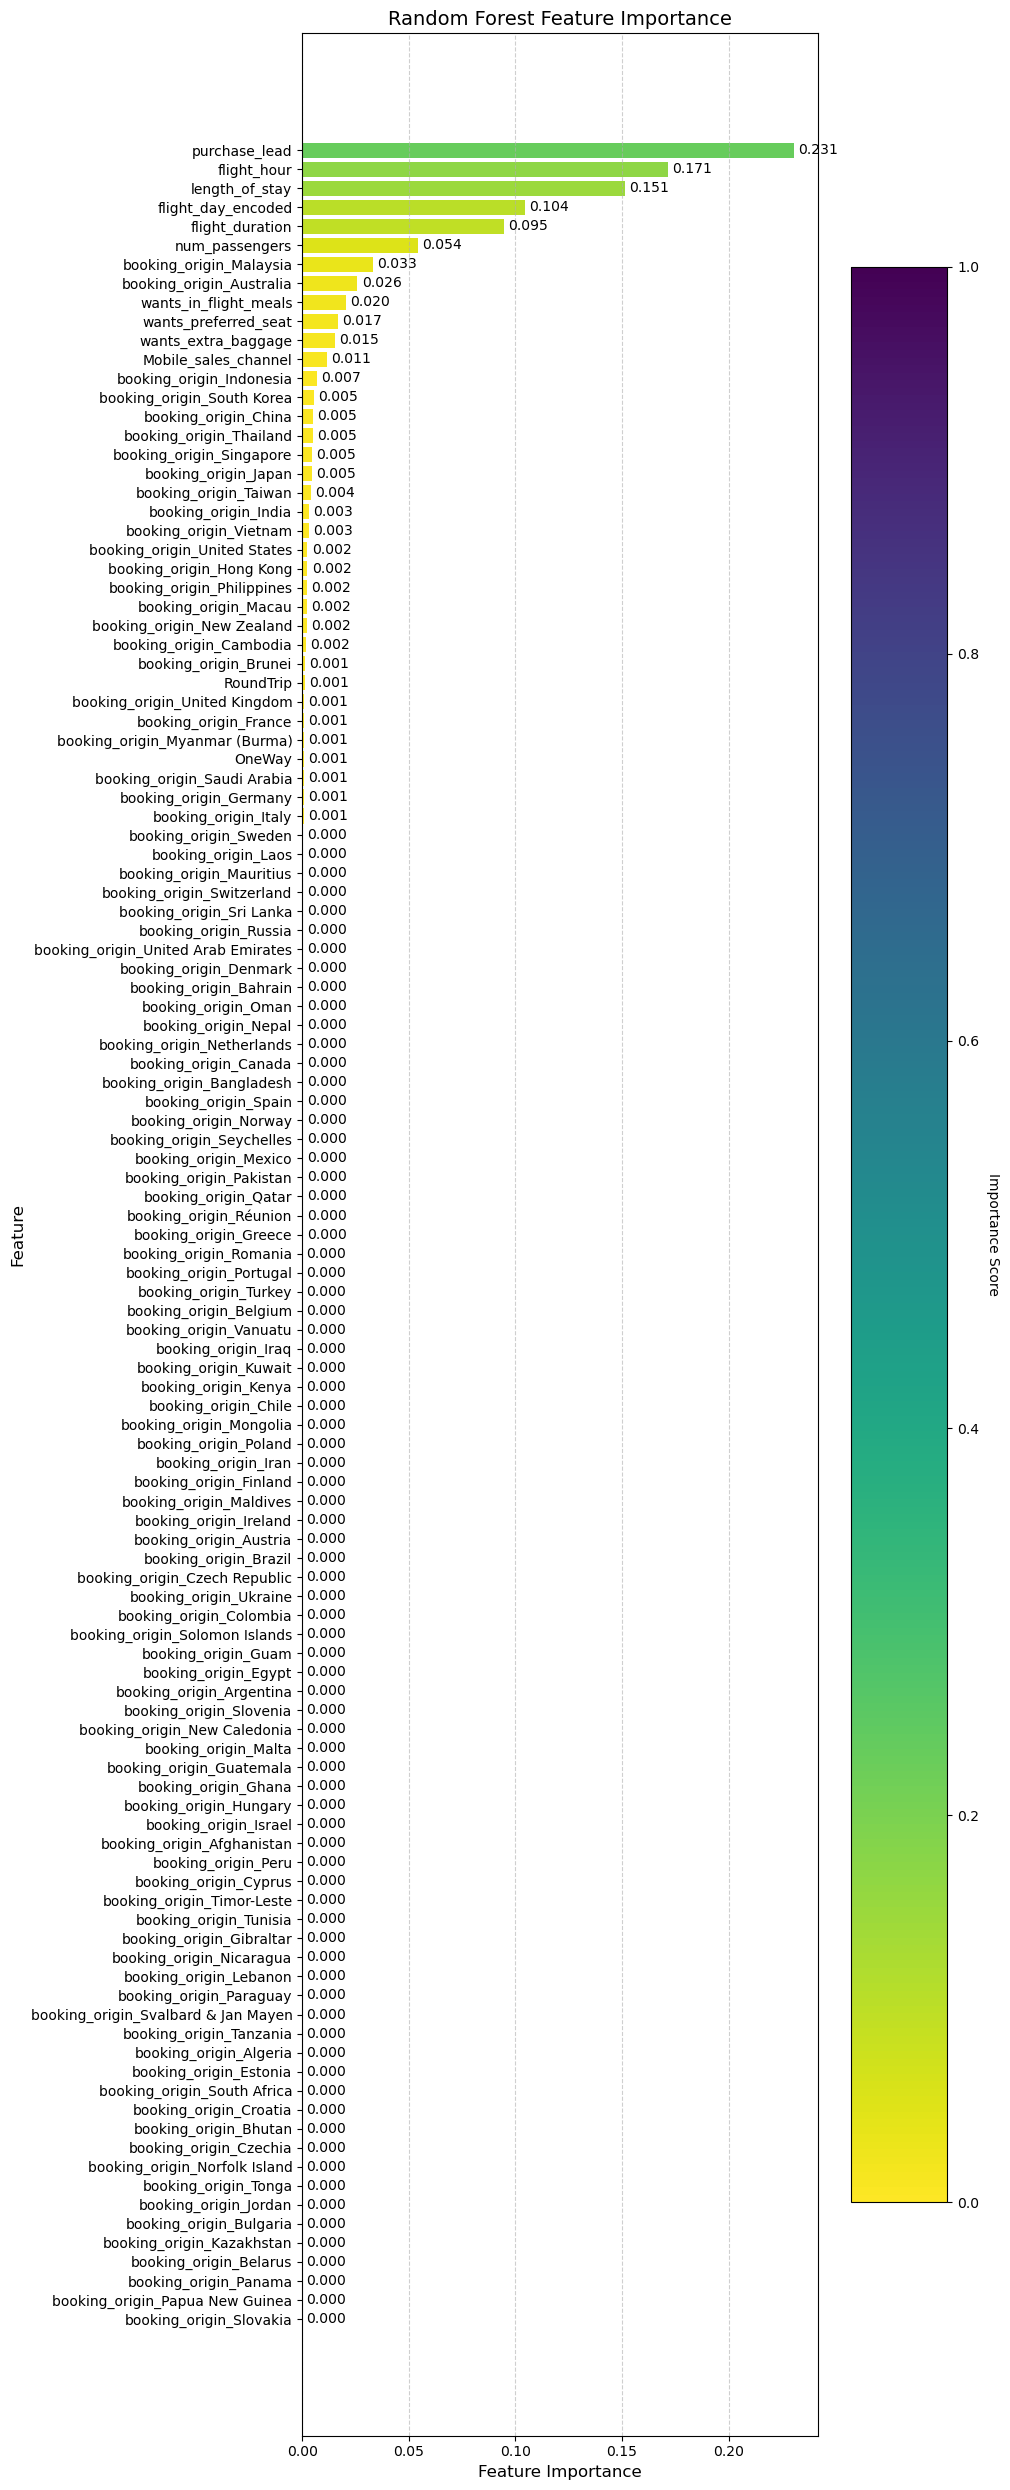

In [79]:
plt.figure(figsize=(10, 25))
colors = plt.cm.viridis_r(feature_data["importance"])

bars = plt.barh(feature_data["feature"], feature_data["importance"], color=colors)

for bar, value in zip(bars, feature_data["importance"]):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Random Forest Feature Importance", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical')
cbar.set_label("Importance Score", rotation=270, labelpad=15, fontsize=10)

plt.tight_layout()
plt.show()